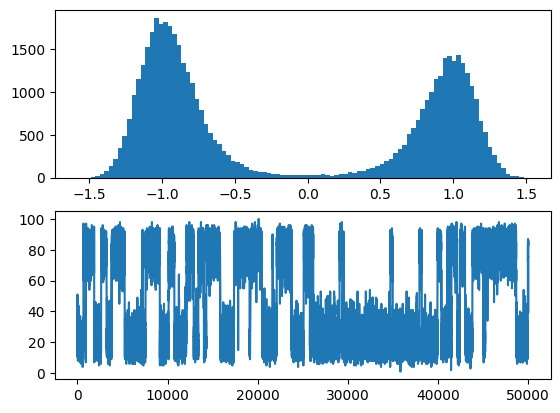

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


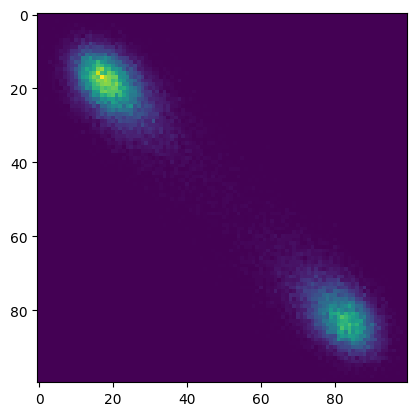

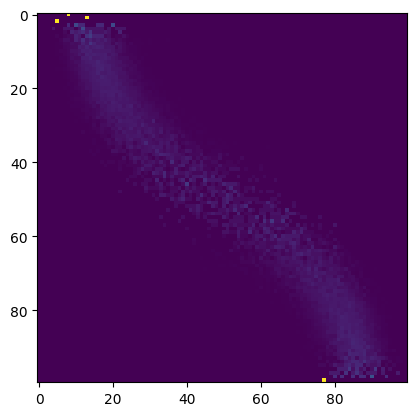

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = [float(x.strip("\n")) for x in open("traj.txt", "r").readlines()]

histogram = np.histogram(data, 100)

fig, axs = plt.subplots(2)
maxval = max(data)
minval = min(data)
bins = np.linspace(minval, maxval, 100)
disc = np.digitize(data, bins)
axs[0].hist(data, bins=100)
axs[1].plot(disc)
plt.show()


binoffset = (maxval + abs(minval))/100
binintervals = []

last = minval
for _ in range(100):
    intervalmin = last
    intervalmax = last + binoffset
    last = intervalmax
    binintervals.append([intervalmin, intervalmax])

def between(num: float) -> int:
    for i, inter in enumerate(binintervals):
        if num >= inter[0] and num < inter[1]:
            return i

countmatrix = np.zeros((100,100))

state = data.pop(0)
statei = between(state)
for transition in data: 
    transj = between(transition)
    countmatrix[statei, transj] += 1
    state = transj
    statei = transj

fig, ax = plt.subplots()
im = ax.imshow(countmatrix)
transitionmatrixnp = np.zeros((100,100))
transitionmatrix = list(transitionmatrixnp)
for j in range(100):
    rowsum = sum(countmatrix[j])
    transitionmatrix[j] = [(x/rowsum) for x in countmatrix[j]]



fig, ax = plt.subplots()
im = ax.imshow(np.array(transitionmatrix))
        

